In [120]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Clustering after Dimensionality Reduction

In [121]:
df = pd.read_csv("../../data/external/senegal_weather_spei_1970_2020_025x025_v3.csv")

In [122]:
df.head()

,Unnamed: 0,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,...,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon
0,0,1970,1,16.692072,-16.043186,0.00,23.194412,0.333824,22.962059,231.441176,...,25.345588,26.505000,29.255000,6,0.061824,NaN,NaN,NaN,NaN,NaN
1,1,1970,2,16.692072,-16.043186,0.00,25.701786,0.325000,25.835714,239.714286,...,27.025714,26.521071,28.273929,6,-0.595051,NaN,NaN,NaN,NaN,NaN
2,2,1970,3,16.692072,-16.043186,0.00,25.656452,0.401613,27.049355,288.419355,...,28.153226,28.197419,28.140645,6,0.080660,-0.224773,NaN,NaN,NaN,NaN
3,3,1970,4,16.692072,-16.043186,0.03,28.186000,0.319333,28.936333,317.600000,...,30.357333,29.361000,28.247000,6,-1.718752,-0.965743,NaN,NaN,NaN,NaN
4,4,1970,5,16.692072,-16.043186,0.00,26.190968,0.521935,30.060968,315.419355,...,30.270000,30.381613,28.838387,6,0.549326,-0.317980,NaN,NaN,NaN,NaN


In [123]:
df_data = df.iloc[:, 5:16]
df_data.head()

,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4
0,0.00,23.194412,0.333824,22.962059,231.441176,321.000000,173.120000,24.512353,25.345588,26.505000,29.255000
1,0.00,25.701786,0.325000,25.835714,239.714286,349.035714,168.727857,27.333571,27.025714,26.521071,28.273929
2,0.00,25.656452,0.401613,27.049355,288.419355,343.258065,216.963226,28.188387,28.153226,28.197419,28.140645
3,0.03,28.186000,0.319333,28.936333,317.600000,345.333333,247.384667,30.874333,30.357333,29.361000,28.247000
4,0.00,26.190968,0.521935,30.060968,315.419355,362.225806,246.730968,30.200000,30.270000,30.381613,28.838387


In [124]:
df_data


,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4
0,0.00,23.194412,0.333824,22.962059,231.441176,321.000000,173.120000,24.512353,25.345588,26.505000,29.255000
1,0.00,25.701786,0.325000,25.835714,239.714286,349.035714,168.727857,27.333571,27.025714,26.521071,28.273929
2,0.00,25.656452,0.401613,27.049355,288.419355,343.258065,216.963226,28.188387,28.153226,28.197419,28.140645
3,0.03,28.186000,0.319333,28.936333,317.600000,345.333333,247.384667,30.874333,30.357333,29.361000,28.247000
4,0.00,26.190968,0.521935,30.060968,315.419355,362.225806,246.730968,30.200000,30.270000,30.381613,28.838387
...,...,...,...,...,...,...,...,...,...,...,...
200119,15.11,26.544194,0.853871,37.702903,183.032258,418.903226,98.931613,27.547097,27.200645,28.180645,30.475806
200120,11.34,26.357667,0.847000,37.193000,201.800000,415.166667,128.167000,27.230667,26.918333,27.481667,29.052333
200121,4.70,27.429677,0.747419,37.265161,247.612903,394.677419,188.425161,27.865806,27.354516,27.666452,28.319677
200122,0.01,27.442667,0.437667,30.932333,246.766667,363.300000,196.062000,28.198667,27.891000,27.932000,28.086000


In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data)

In [127]:
pca = PCA()
pca.fit(data_scaled)

PCA()

In [138]:
data_scaled_withcol = pd.DataFrame(data_scaled,columns = df_data.columns) 

In [128]:
pca.explained_variance_ratio_

array([4.96244928e-01, 3.56509370e-01, 8.49741696e-02, 2.83003207e-02,
       1.64187896e-02, 1.13504371e-02, 2.39549254e-03, 1.75600715e-03,
       1.30032233e-03, 5.66133964e-04, 1.84028412e-04])

Text(0, 0.5, 'Cumulative Var')

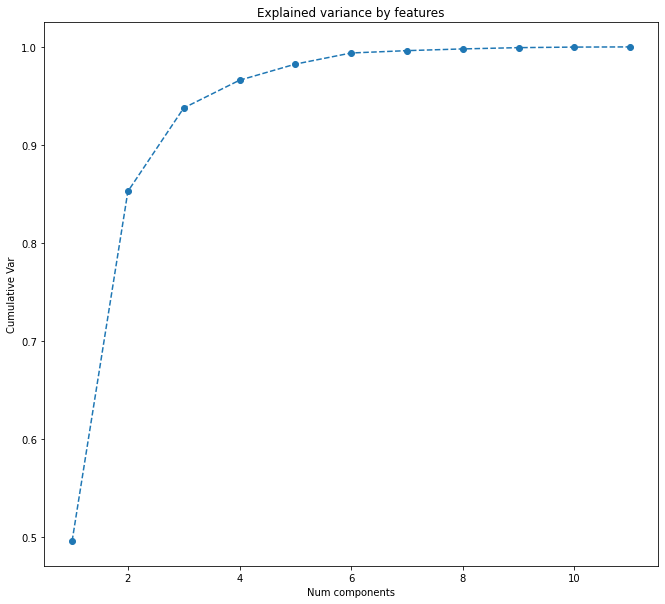

In [129]:
plt.figure(figsize=(11,10))
plt.plot(range(1,12), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by features')
plt.xlabel('Num components')
plt.ylabel('Cumulative Var')

In [148]:
pca = PCA(n_components=2)
pca.fit(data_scaled)

PCA(n_components=2)

In [149]:
scores_pca = pca.transform(data_scaled)

In [133]:
wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)


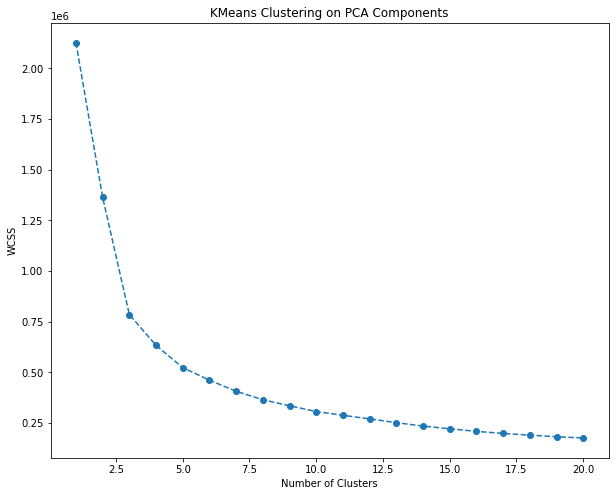

In [134]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.title('KMeans Clustering on PCA Components')
plt.ylabel('WCSS')
plt.show()

In [150]:
pca.explained_variance_ratio_

array([0.49624493, 0.35650937])

In [152]:
print(pd.DataFrame(pca.components_,columns=data_scaled_withcol.columns,index = ['PC-1','PC-2']))

      total_precipitation  temperature  relative_humidity   humidex  \
PC-1             0.055719    -0.410685           0.027750 -0.277908   
PC-2             0.440431    -0.038822           0.450531  0.346602   

      surface_solar_radiation  surface_thermal_radiation  \
PC-1                -0.248600                  -0.231311   
PC-2                -0.343338                   0.405560   

      surface_direct_solar_radiation  soil_temperature_level_1  \
PC-1                       -0.206825                 -0.421655   
PC-2                       -0.401107                 -0.045805   

      soil_temperature_level_2  soil_temperature_level_3  \
PC-1                 -0.401374                 -0.411933   
PC-2                 -0.041373                  0.035163   

      soil_temperature_level_4  
PC-1                 -0.289073  
PC-2                  0.181962  


In [15]:
kmeans_pca = KMeans(n_clusters=4, init="k-means++", random_state=42)

In [16]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [17]:
scores_pca

array([[ 3.63048182, -1.62199227, -0.95448171],
       [ 2.4989591 , -1.32575288, -0.35239447],
       [ 1.48280211, -2.09076265,  0.61389105],
       ...,
       [ 1.0887298 ,  1.11302089,  1.50610085],
       [ 1.35610199, -0.98074407,  0.43109066],
       [ 1.61833485, -0.89863142, -0.11432633]])

In [18]:
len(kmeans_pca.labels_)

200124

In [19]:
df_with_pca = pd.concat([df[["gpslat", "gpslon"]], df_data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)

In [20]:
df_with_pca["Cluster"] = kmeans_pca.labels_

In [39]:
df_with_pca

,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,0,1,2,Cluster
0,16.692072,-16.043186,0.00,23.194412,0.333824,22.962059,231.441176,321.000000,173.120000,24.512353,25.345588,26.505000,29.255000,3.630482,-1.621992,-0.954482,1
1,16.692072,-16.043186,0.00,25.701786,0.325000,25.835714,239.714286,349.035714,168.727857,27.333571,27.025714,26.521071,28.273929,2.498959,-1.325753,-0.352394,1
2,16.692072,-16.043186,0.00,25.656452,0.401613,27.049355,288.419355,343.258065,216.963226,28.188387,28.153226,28.197419,28.140645,1.482802,-2.090763,0.613891,1
3,16.692072,-16.043186,0.03,28.186000,0.319333,28.936333,317.600000,345.333333,247.384667,30.874333,30.357333,29.361000,28.247000,-0.085167,-2.746402,0.995414,0
4,16.692072,-16.043186,0.00,26.190968,0.521935,30.060968,315.419355,362.225806,246.730968,30.200000,30.270000,30.381613,28.838387,-0.054734,-1.943582,1.252753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200119,12.442072,-11.543186,15.11,26.544194,0.853871,37.702903,183.032258,418.903226,98.931613,27.547097,27.200645,28.180645,30.475806,1.801138,4.644762,-0.008416,3
200120,12.442072,-11.543186,11.34,26.357667,0.847000,37.193000,201.800000,415.166667,128.167000,27.230667,26.918333,27.481667,29.052333,1.890208,3.503455,0.743044,3
200121,12.442072,-11.543186,4.70,27.429677,0.747419,37.265161,247.612903,394.677419,188.425161,27.865806,27.354516,27.666452,28.319677,1.088730,1.113021,1.506101,3
200122,12.442072,-11.543186,0.01,27.442667,0.437667,30.932333,246.766667,363.300000,196.062000,28.198667,27.891000,27.932000,28.086000,1.356102,-0.980744,0.431091,1


In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import descartes
%matplotlib inline

In [40]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_with_pca["gpslon"], df_with_pca["gpslat"])]
geo_df = gpd.GeoDataFrame(df_with_pca, crs=crs, geometry=geometry)

C:\Users\Tanya\anaconda3\envs\omdena-GPSDD\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [41]:
geo_df.head

<bound method NDFrame.head of            gpslat     gpslon  total_precipitation  temperature  \
0       16.692072 -16.043186                 0.00    23.194412   
1       16.692072 -16.043186                 0.00    25.701786   
2       16.692072 -16.043186                 0.00    25.656452   
3       16.692072 -16.043186                 0.03    28.186000   
4       16.692072 -16.043186                 0.00    26.190968   
...           ...        ...                  ...          ...   
200119  12.442072 -11.543186                15.11    26.544194   
200120  12.442072 -11.543186                11.34    26.357667   
200121  12.442072 -11.543186                 4.70    27.429677   
200122  12.442072 -11.543186                 0.01    27.442667   
200123  12.442072 -11.543186                 0.00    27.647273   

        relative_humidity    humidex  surface_solar_radiation  \
0                0.333824  22.962059               231.441176   
1                0.325000  25.835714           

<AxesSubplot:>

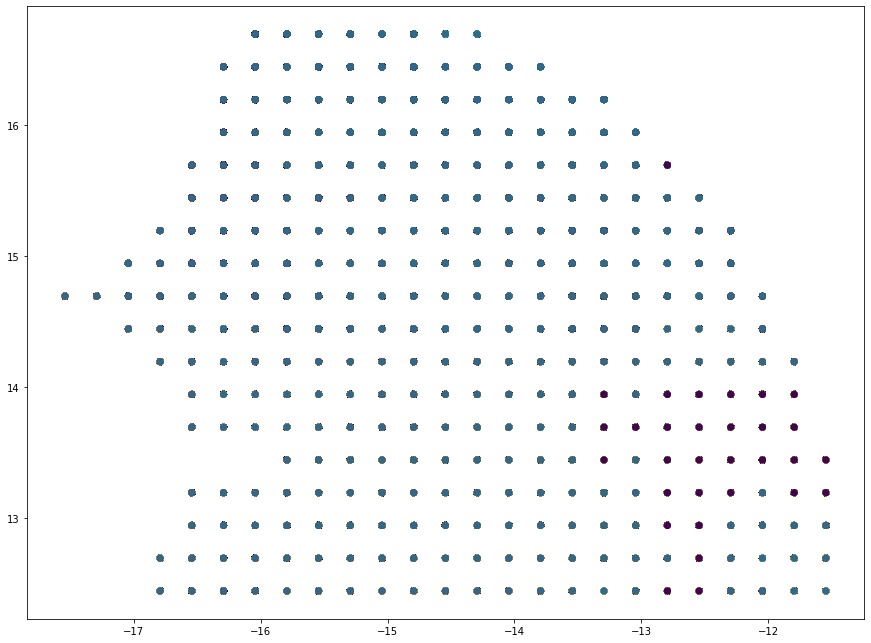

In [46]:
fig, ax = plt.subplots(figsize=(15,15))
#geo_df.plot(ax=ax, color='grey')
geo_df.plot(ax=ax, c=geo_df["Cluster"])

## Blind Clustering

In [21]:
df_data

,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4
0,0.00,23.194412,0.333824,22.962059,231.441176,321.000000,173.120000,24.512353,25.345588,26.505000,29.255000
1,0.00,25.701786,0.325000,25.835714,239.714286,349.035714,168.727857,27.333571,27.025714,26.521071,28.273929
2,0.00,25.656452,0.401613,27.049355,288.419355,343.258065,216.963226,28.188387,28.153226,28.197419,28.140645
3,0.03,28.186000,0.319333,28.936333,317.600000,345.333333,247.384667,30.874333,30.357333,29.361000,28.247000
4,0.00,26.190968,0.521935,30.060968,315.419355,362.225806,246.730968,30.200000,30.270000,30.381613,28.838387
...,...,...,...,...,...,...,...,...,...,...,...
200119,15.11,26.544194,0.853871,37.702903,183.032258,418.903226,98.931613,27.547097,27.200645,28.180645,30.475806
200120,11.34,26.357667,0.847000,37.193000,201.800000,415.166667,128.167000,27.230667,26.918333,27.481667,29.052333
200121,4.70,27.429677,0.747419,37.265161,247.612903,394.677419,188.425161,27.865806,27.354516,27.666452,28.319677
200122,0.01,27.442667,0.437667,30.932333,246.766667,363.300000,196.062000,28.198667,27.891000,27.932000,28.086000


In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data)

In [23]:
wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_pca.fit(data_scaled)
    wcss.append(kmeans_pca.inertia_)

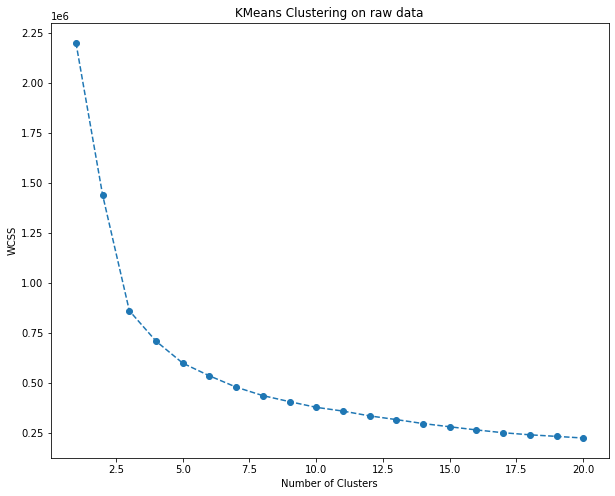

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.title('KMeans Clustering on raw data')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans_raw = KMeans(n_clusters=10, init="k-means++", random_state=42)
kmeans_raw.fit(data_scaled)

KMeans(n_clusters=10, random_state=42)

In [26]:
kmeans_raw.labels_

array([0, 0, 4, ..., 9, 4, 8])

In [27]:
df_raw_data = pd.concat([df[["gpslat", "gpslon"]], df_data.reset_index(drop=True)], axis=1)

In [28]:
df_raw_data

,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4
0,16.692072,-16.043186,0.00,23.194412,0.333824,22.962059,231.441176,321.000000,173.120000,24.512353,25.345588,26.505000,29.255000
1,16.692072,-16.043186,0.00,25.701786,0.325000,25.835714,239.714286,349.035714,168.727857,27.333571,27.025714,26.521071,28.273929
2,16.692072,-16.043186,0.00,25.656452,0.401613,27.049355,288.419355,343.258065,216.963226,28.188387,28.153226,28.197419,28.140645
3,16.692072,-16.043186,0.03,28.186000,0.319333,28.936333,317.600000,345.333333,247.384667,30.874333,30.357333,29.361000,28.247000
4,16.692072,-16.043186,0.00,26.190968,0.521935,30.060968,315.419355,362.225806,246.730968,30.200000,30.270000,30.381613,28.838387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200119,12.442072,-11.543186,15.11,26.544194,0.853871,37.702903,183.032258,418.903226,98.931613,27.547097,27.200645,28.180645,30.475806
200120,12.442072,-11.543186,11.34,26.357667,0.847000,37.193000,201.800000,415.166667,128.167000,27.230667,26.918333,27.481667,29.052333
200121,12.442072,-11.543186,4.70,27.429677,0.747419,37.265161,247.612903,394.677419,188.425161,27.865806,27.354516,27.666452,28.319677
200122,12.442072,-11.543186,0.01,27.442667,0.437667,30.932333,246.766667,363.300000,196.062000,28.198667,27.891000,27.932000,28.086000


In [29]:
df_raw_data["cluster_assignments"] = kmeans_raw.labels_

In [30]:
df_raw_data

,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,cluster_assignments
0,16.692072,-16.043186,0.00,23.194412,0.333824,22.962059,231.441176,321.000000,173.120000,24.512353,25.345588,26.505000,29.255000,0
1,16.692072,-16.043186,0.00,25.701786,0.325000,25.835714,239.714286,349.035714,168.727857,27.333571,27.025714,26.521071,28.273929,0
2,16.692072,-16.043186,0.00,25.656452,0.401613,27.049355,288.419355,343.258065,216.963226,28.188387,28.153226,28.197419,28.140645,4
3,16.692072,-16.043186,0.03,28.186000,0.319333,28.936333,317.600000,345.333333,247.384667,30.874333,30.357333,29.361000,28.247000,4
4,16.692072,-16.043186,0.00,26.190968,0.521935,30.060968,315.419355,362.225806,246.730968,30.200000,30.270000,30.381613,28.838387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200119,12.442072,-11.543186,15.11,26.544194,0.853871,37.702903,183.032258,418.903226,98.931613,27.547097,27.200645,28.180645,30.475806,7
200120,12.442072,-11.543186,11.34,26.357667,0.847000,37.193000,201.800000,415.166667,128.167000,27.230667,26.918333,27.481667,29.052333,7
200121,12.442072,-11.543186,4.70,27.429677,0.747419,37.265161,247.612903,394.677419,188.425161,27.865806,27.354516,27.666452,28.319677,9
200122,12.442072,-11.543186,0.01,27.442667,0.437667,30.932333,246.766667,363.300000,196.062000,28.198667,27.891000,27.932000,28.086000,4


In [31]:
fig, ax = plt.subplots(figsize=(15,15))
#geo_df.plot(ax=ax, color='grey')
plt.scatter(df_raw_data["gpslon"], df_raw_data["gpslat"], c=df_raw_data[sea"cluster_assignments"])

SyntaxError: invalid syntax (<ipython-input-31-354bb3c5f0d6>, line 3)

In [ ]:
import seaborn as sns



In [ ]:
#df = pd.DataFrame(data,columns=mnist.feature_names)
#df['target']=target
#df['x']=x
#df['y']=y

plt.figure(figsize=(16,7))
sns.scatterplot(x=df_raw_data["gpslon"],y=df_raw_data["gpslat"],hue=df_raw_data["cluster_assignments"],palette=sns.color_palette("hls",10),
               legend="full")
plt.show()

## Gaussian Mixture Modeling (On Raw Data)

## Clustering Per Year

In [33]:
df = pd.read_csv("../../data/external/senegal_weather_spei_1970_2020_025x025_v3.csv")
df = df.reset_index(drop=True)
df_x = df.drop_duplicates(['gpslat', 'gpslon'])
df_x = df_x.reset_index(drop=True)

lat_long_unique = df_x[["gpslat", "gpslon"]]

In [34]:
latlong=np.array(lat_long_unique)

In [35]:
features = ['temperature', 
              'relative_humidity', 
              'humidex', 
              'surface_solar_radiation', 
              'surface_thermal_radiation', 
              'surface_direct_solar_radiation',  
              'soil_temperature_level_1', 
              'soil_temperature_level_2', 
              'soil_temperature_level_3', 
              'soil_temperature_level_4', 
              'total_precipitation']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled["year"] = df["year"]
df_scaled["month"] = df["month"]
df_scaled["gpslat"] = df["gpslat"]
df_scaled["gpslon"] = df["gpslon"]

In [9]:
# Create vectors for each lat long now
def create_vectors(year):

    X = []
    df_year = df_scaled[df_scaled["year"]==year]
    #print(df_year)

    #i=0
    for row in latlong:
        single_data=[]
        #i+=1
        match=df_year[(df_year["gpslat"]==row[0]) & (df_year["gpslon"]==row[1])]
        #print(len(match)) - all 612 - 51 years*12 months
        for feat in features:
            single_data = np.append(single_data, match[feat])
        #print(len(single_data))
        X.append(single_data)
#         if i==1:
#             break
    return X
    
data_vars = create_vectors(2012)

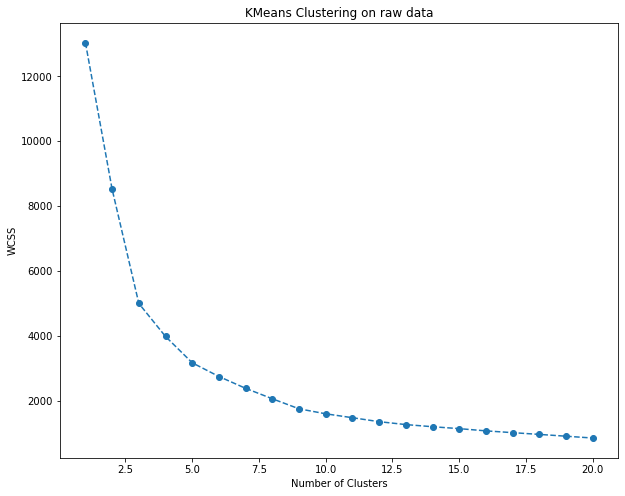

In [10]:
wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_pca.fit(data_vars)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.title('KMeans Clustering on raw data')
plt.ylabel('WCSS')
plt.show()

In [11]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans_pca.fit(data_vars)

KMeans(n_clusters=3, random_state=42)

In [12]:
kmeans_pca.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

C:\Users\Tanya\anaconda3\envs\omdena-GPSDD\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


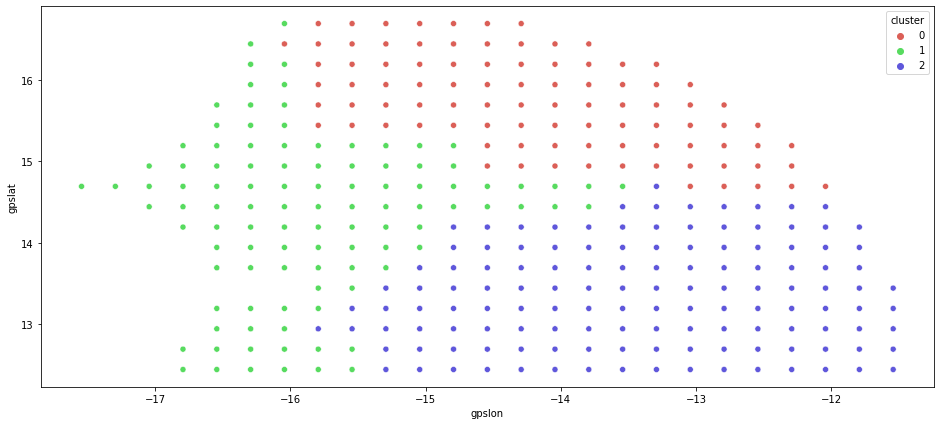

In [13]:
lat_long_unique["cluster"] = kmeans_pca.labels_

import seaborn as sns

plt.figure(figsize=(16,7))
sns.scatterplot(x=lat_long_unique["gpslon"], y=lat_long_unique["gpslat"],hue=lat_long_unique["cluster"],palette=sns.color_palette("hls",3),
               legend="full")
plt.show()

### https://www.uncclearn.org/wp-content/uploads/library/wfp10.pdf

## Clustering - All years

In [36]:
# Create vectors for each lat long now
def create_vectors():

    X = []
    #df_year = df_scaled[df_scaled["year"]==year]
    #print(df_year)

    #i=0
    for row in latlong:
        single_data=[]
        #i+=1
        match=df_scaled[(df_scaled["gpslat"]==row[0]) & (df_scaled["gpslon"]==row[1])]
        #print(len(match)) - all 612 - 51 years*12 months
        for feat in features:
            single_data = np.append(single_data, match[feat])
        #print(len(single_data))
        X.append(single_data)
#         if i==1:
#             break
    return X
    
data_vars = create_vectors()

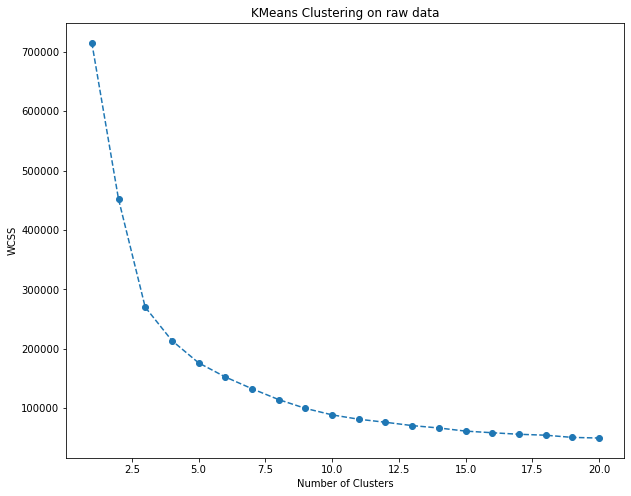

In [37]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(data_vars)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.title('KMeans Clustering on raw data')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans.labels_

array([1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
len(data_vars[0])

6732

In [107]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans.fit(data_vars)

KMeans(n_clusters=3, random_state=42)

In [108]:
len(kmeans.labels_)

327

In [109]:
from sklearn import metrics
metrics.silhouette_score(data_vars, kmeans.labels_, metric='euclidean')

0.4094637276637693

C:\Users\Tanya\anaconda3\envs\omdena-GPSDD\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


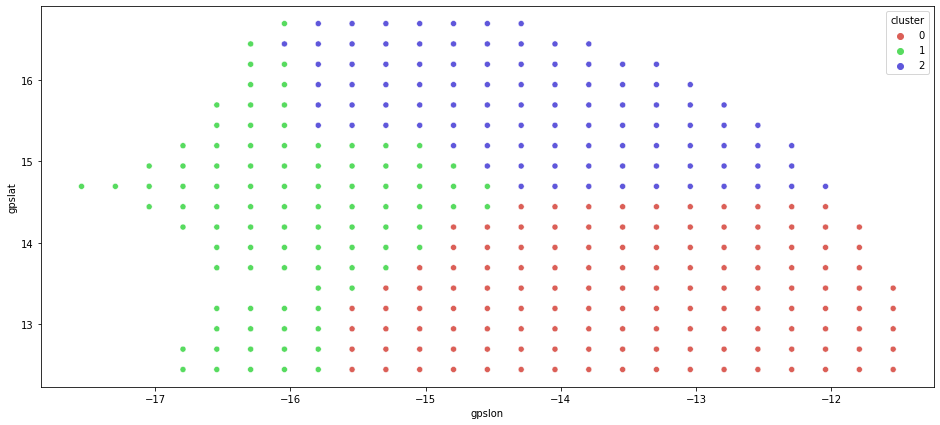

In [110]:
lat_long_unique["cluster"] = kmeans.labels_

import seaborn as sns

plt.figure(figsize=(16,7))
sns.scatterplot(x=lat_long_unique["gpslon"], y=lat_long_unique["gpslat"],hue=lat_long_unique["cluster"],palette=sns.color_palette("hls",3),
               legend="full")
plt.show()

## Gaussiam Mixture Modeling

In [112]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data_vars)
labels = gmm.predict(data_vars)

In [113]:
labels

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [114]:
lat_long_unique["gmm_cluster"] = labels

C:\Users\Tanya\anaconda3\envs\omdena-GPSDD\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


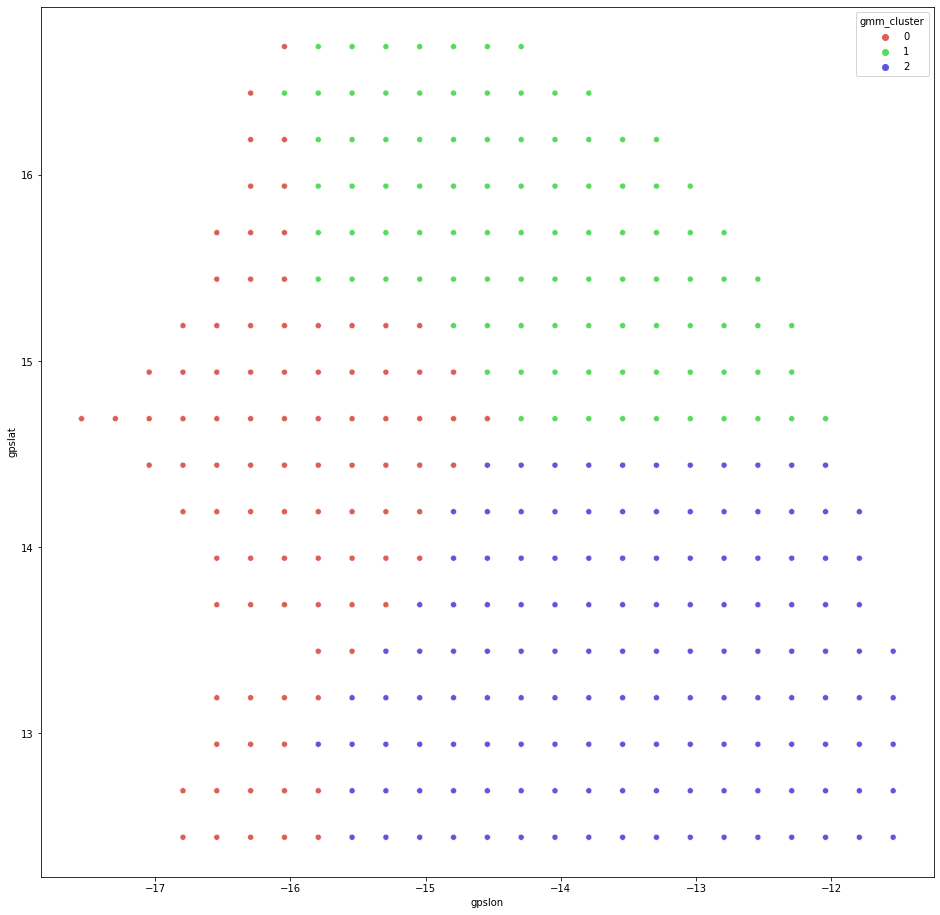

In [116]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=lat_long_unique["gpslon"], y=lat_long_unique["gpslat"],hue=lat_long_unique["gmm_cluster"],palette=sns.color_palette("hls",3),
               legend="full")
plt.show()

In [117]:
probs = gmm.predict_proba(data_vars)

In [118]:
metrics.silhouette_score(data_vars, labels, metric='euclidean')

0.4092990818019874

In [119]:
probs

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

##### Year-wise SPEI classification vs Clutering - How accurate?

##### Evaluate Clustering, How do you decide the number of clusters? - Find distance between clusters - Done Above